# Clustergam: visualisation of cluster analysis

When we want to do some cluster analysis to identify groups in our data, we often use algorithms like K-Means, which require the specification of a number of clusters. But the issue is that we usually don't know how many clusters there are. 

There are many methods on how to determine the correct number, like silhouettes or elbow plot, to name a few. But they usually don't give much insight into what is happening between different options, so the numbers are a bit abstract.

[Matthias Schonlau](http://www.schonlau.net/clustergram.html) proposed another approach - a clustergram. Clustergram is a two-dimensional plot capturing the flows of observations between classes as you add more clusters. It tells you how your data reshuffles and how good your splits are. [Tal Galili](https://www.r-statistics.com/2010/06/clustergram-visualization-and-diagnostics-for-cluster-analysis-r-code/) later implemented clustergram for K-Means in R. And I have used Tal's implementation, ported it to Python and created `clustergram` - a Python package to make clustergrams.

`clustergram` currently supports K-Means and using `scikit-learn` (inlcuding Mini-Batch implementation) and RAPIDS.AI `cuML` (if you have a CUDA-enabled GPU), Gaussian Mixture Model (`scikit-learn` only) and hierarchical clustering based on `scipy.hierarchy`. Alternatively, we can create clustergram based on labels and data derived from alternative custom clustering algorithms. It provides a sklearn-like API and plots clustergram using matplotlib, which gives it a wide range of styling options to match your publication style.

## Install

You can install clustergram from conda or pip:
```shell
conda install clustergram -c conda-forge
```
or
```shell
pip install clustergram
```

In any case, you still need to install your selected backend (scikit-learn and scipy or cuML).

In [1]:
from clustergram import Clustergram
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
sns.set(style='whitegrid')

Let us look at some examples to understand how clustergram looks and what to do with it.

## Iris flower data set

The first example which we try to analyse using clustergram is the famous Iris flower data set. It contains data on three species of Iris flowers measuring sepal width and length and petal width and length. We can start with some exploration:

Text(0.5, 1.01, 'Iris flowers')

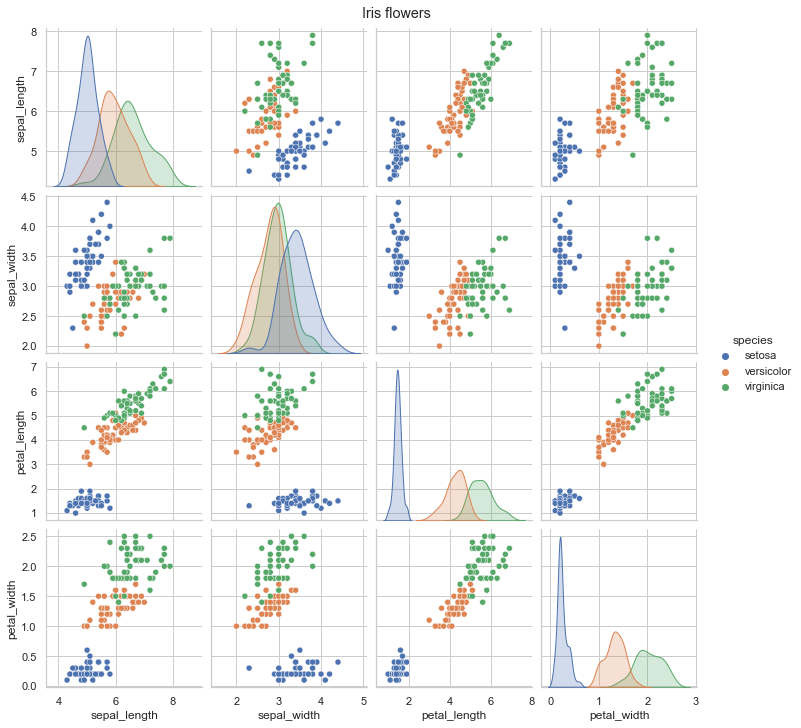

In [3]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")
g.fig.suptitle("Iris flowers", y=1.01)

It seems that _setosa_ is a relatively well-defined group, while the difference between _versicolor_ and _virginica_ is smaller as they partially overlap (or entirely in the case of sepal width). 

Okay, so we know how the data looks. Now we can check how does clustergram look. Remember that we know that there are three clusters, and we should ideally be able to recognise this from clustergram. I am saying ideally because even though there are known labels, it does not mean that our data or clustering method are able to distinguish between those classes.

Let's start with K-Means clustering. To get a stable result, we can run a clustergram with 1000 initialisations.

In [4]:
data = scale(iris.drop(columns=['species']))

In [5]:
cgram = Clustergram(range(1, 10), n_init=1000)
cgram.fit(data)

K=1 fitted in 2.3119359016418457 seconds.
K=2 fitted in 0.7519302368164062 seconds.
K=3 fitted in 1.380197286605835 seconds.
K=4 fitted in 2.1237080097198486 seconds.
K=5 fitted in 2.4642157554626465 seconds.
K=6 fitted in 2.1841089725494385 seconds.
K=7 fitted in 2.4315130710601807 seconds.
K=8 fitted in 2.996204137802124 seconds.
K=9 fitted in 2.9375381469726562 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

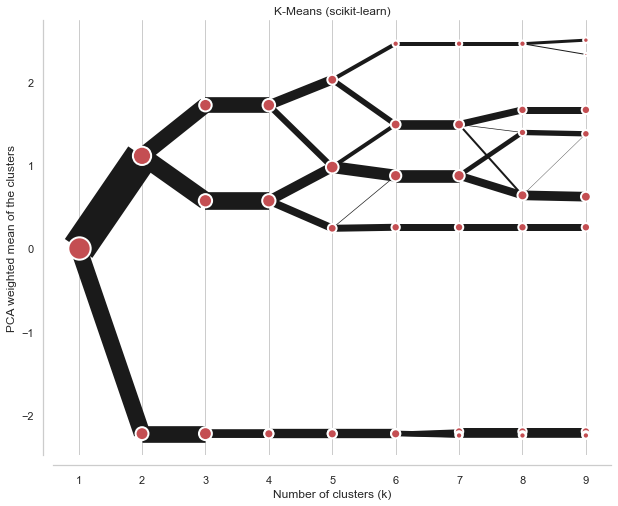

In [6]:
ax = cgram.plot(figsize=(10, 8))
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

On the _x_ axis, we can see the number of clusters. Points represent a centre of each cluster (by default) weighted by the first principal component (that helps with the diagram's readability). The lines connecting points and their thickness represent observations moving between clusters. Therefore, we can read when new clusters are formed as a split of a single existing class and when they are formed based on observations from two clusters.

We're looking for the separation, i.e., did an additional cluster bring any meaningful split? The step from one cluster to two is a big one - nice and clear separation. From two to three, we also have quite a nice split in the top branch. But from 3 to 4, there is no visible difference because the new fourth cluster is almost the same as the existing bottom branch. Although it is now separated into two, this split does not give us much information. Therefore, we could conclude that the ideal number of clusters for Iris data is three.

We can also check some additional information, like a silhouette score or Calinski-Harabazs score.

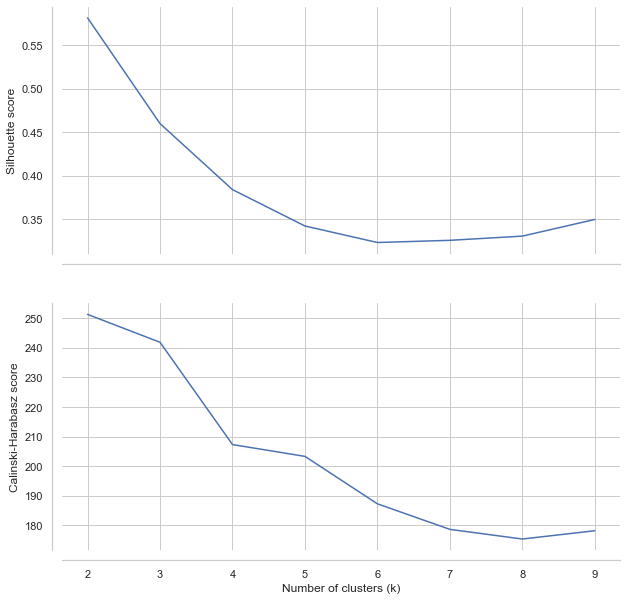

In [7]:
fig, axs = plt.subplots(2, figsize=(10, 10), sharex=True)
cgram.silhouette_score().plot(xlabel="Number of clusters (k)", ylabel="Silhouette score", ax=axs[0])
cgram.calinski_harabasz_score().plot(xlabel="Number of clusters (k)", ylabel="Calinski-Harabasz score", ax=axs[1])
sns.despine(offset=10)

These plots would suggest 3-4 clusters, similarly to clustergram, but they are not very conclusive.

## Palmer penguins data set

Now let's try different data, one where clusters are a bit more complicated to assess. Palmer penguins contain similar data as Iris example, but it measures several attributes of three species of penguins.

In [8]:
penguins = sns.load_dataset("penguins")

Text(0.5, 1.01, 'Palmer penguins')

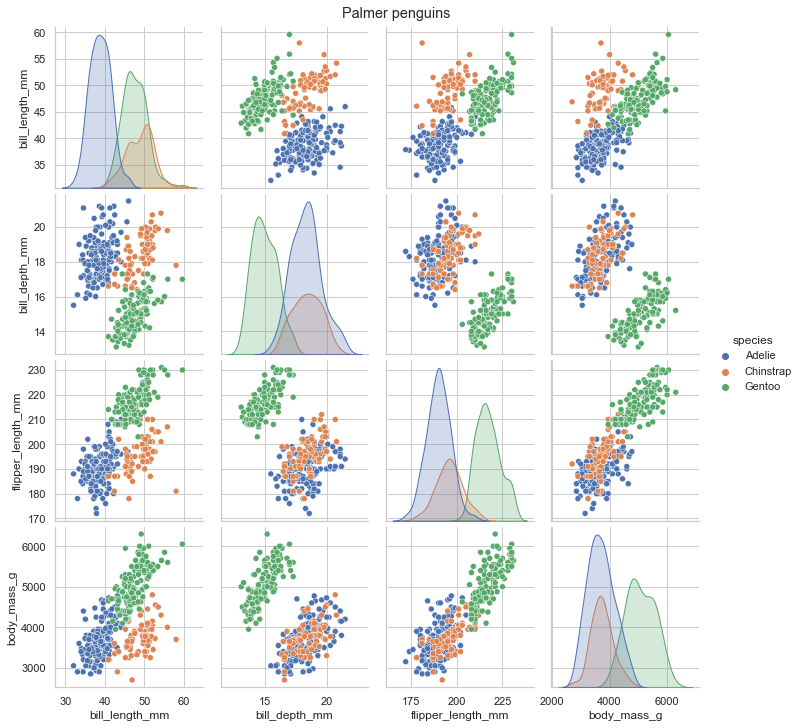

In [9]:
g = sns.pairplot(penguins, hue="species")
g.fig.suptitle("Palmer penguins", y=1.01)

Looking at the situation, we see that the overlap between species is much higher than before. It will likely be much more complicated to identify them. Again, we know that there are three _clusters_, but that does not mean that data has the power to distinguish between them. In this case, it may be especially tricky to differentiate between _Adelie_ and _Chinstrap_ penguins.

In [10]:
penguins = sns.load_dataset('penguins')

In [11]:
data = scale(penguins.drop(columns=['species', 'island', 'sex']).dropna())

In [12]:
cgram = Clustergram(range(1, 10), n_init=1000)
cgram.fit(data)

K=1 fitted in 2.782831907272339 seconds.
K=2 fitted in 1.244720220565796 seconds.
K=3 fitted in 2.0478179454803467 seconds.
K=4 fitted in 2.480475902557373 seconds.
K=5 fitted in 3.037703275680542 seconds.
K=6 fitted in 3.4877982139587402 seconds.
K=7 fitted in 4.160067796707153 seconds.
K=8 fitted in 3.7954599857330322 seconds.
K=9 fitted in 4.1314170360565186 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

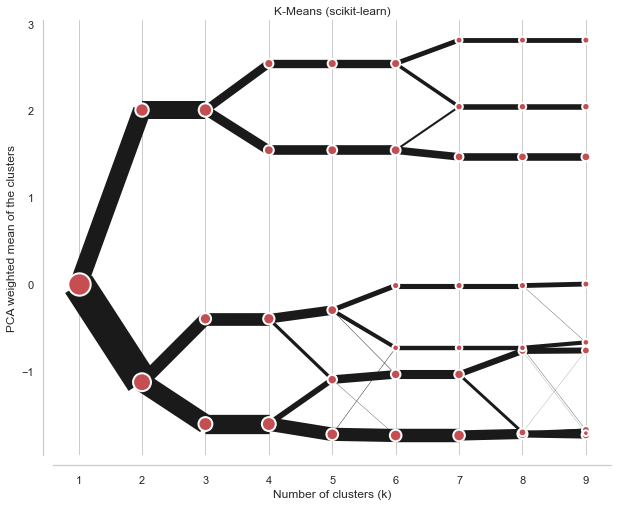

In [13]:
ax = cgram.plot(figsize=(10, 8))
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

We're looking for separations, and this clustergram shows plenty. It is actually quite complicated to determine the optimal number of clusters. However, since we know what happens between different options, we can play with that. If we have a reason to be conservative, we can go with 4 clusters (I know, it is already more than the initial species). But further splits are also reasonable, which indicates that even higher granularity may provide useful insight, that there might be meaningful groups.

Can we say it is three? Since we know it should be three... Well, not really. The difference between the split from 2 - 3 and that from 3 - 4 is slight. However, the culprit here is K-Means, not clustergram. It just simply cannot correctly cluster these data due to the overlaps and the overall structure. 

Let's have a look at how the Gaussian Mixture Model does.

K=1 fitted in 0.5952157974243164 seconds.
K=2 fitted in 0.2548811435699463 seconds.
K=3 fitted in 0.9859671592712402 seconds.
K=4 fitted in 0.6935789585113525 seconds.
K=5 fitted in 0.659264087677002 seconds.
K=6 fitted in 0.8167891502380371 seconds.
K=7 fitted in 1.0208890438079834 seconds.
K=8 fitted in 1.3887920379638672 seconds.
K=9 fitted in 1.669816017150879 seconds.


Text(0.5, 1.0, 'Gaussian Mixture Model (scikit-learn)')

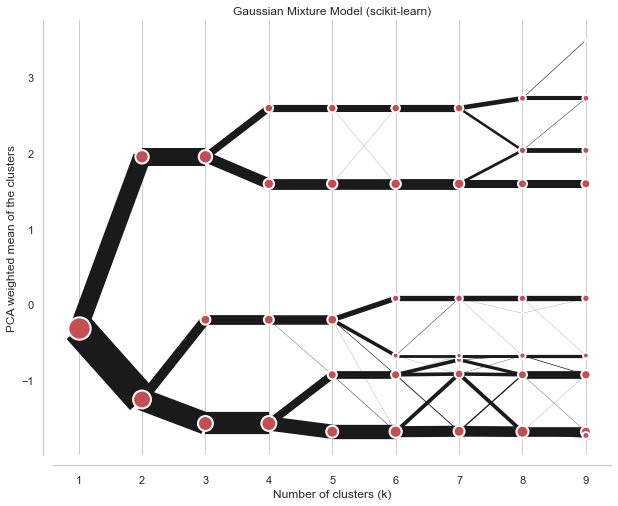

In [14]:
cgram = Clustergram(range(1, 10), n_init=100, method="gmm")
cgram.fit(data)
ax = cgram.plot(figsize=(10, 8))
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('Gaussian Mixture Model (scikit-learn)')

The result is very similar, though the difference between the third and fourth split is more pronounced. Even here, I would probably go with a four cluster solution.

A situation like this happens very often. The ideal case does not exist. We ultimately need to make **a decision** on the optimal number of clusters. Clustergam gives us additional insights into what happens between different options, how it splits. We can tell that the four-cluster option in Iris data is not helpful. We can tell that Palmer penguins may be tricky to cluster using K-Means, that there is no decisive _right_ solution. Clustergram does not give an easy answer, but it gives us additional insight, and it is upon us how we interpret it.

You can install clustergram using `conda install clustergram -c conda-forge` or `pip install clustergram`. In any case, you will still need to install a clustering backend, either `scikit-learn` or `cuML`. The documentation is available at [clustergram.readthedocs.io](https://clustergram.readthedocs.io), and the source code is on [github.com/martinfleis/clustergram](https://github.com/martinfleis/clustergram), released under MIT license.

If you want to play with the examples used in this article, the Jupyter notebook is on [GitHub](https://github.com/martinfleis/clustergram/blob/main/examples/introduction.ipynb). You can also run it in [an interactive binder environment](https://mybinder.org/v2/gh/martinfleis/clustergram/HEAD?filepath=examples%2Fintroduction.ipynb) in your browser.

For more information, check [Tal Galili's blog post](https://www.r-statistics.com/2010/06/clustergram-visualization-and-diagnostics-for-cluster-analysis-r-code/) and [original papers by Matthias Schonlau](http://www.schonlau.net/clustergram.html).

Give it a go!